In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('./train.csv', index_col='id')
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [108]:
features = ['Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction']
for feature in features:
    df[feature].replace(np.nan, 0, inplace=True)
df['Academic/Work Pressure'] = df['Academic Pressure'] + df['Work Pressure']
df['Study/Job Satisfaction'] = df['Study Satisfaction'] + df['Job Satisfaction']
df.drop(['Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction'], axis=1, inplace=True)
df.head()

/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_30300/984753404.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].replace(np.nan, 0, inplace=True)


,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic/Work Pressure,Study/Job Satisfaction
id,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   CGPA                                   27898 non-null   float64
 7   Sleep Duration                         140700 non-null  object 
 8   Dietary Habits                         140696 non-null  object 
 9   Degree                                 140698 non-null  object 
 10  Have you ever had suicidal thoughts ?  140700 non-null  objec

In [110]:
df.drop(['CGPA','Profession'], axis=1, inplace=True)
df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0], inplace=True)
df['Degree'].fillna(df['Degree'].mode()[0], inplace=True)
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)
df.head()

/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_30300/1050641891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0], inplace=True)
/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_30300/1050641891.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

,Name,Gender,Age,City,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic/Work Pressure,Study/Job Satisfaction
id,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,Vivan,Male,26.0,Varanasi,Working Professional,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,Yuvraj,Male,33.0,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,Rhea,Female,30.0,Kanpur,Working Professional,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Sleep Duration                         140700 non-null  object 
 6   Dietary Habits                         140700 non-null  object 
 7   Degree                                 140700 non-null  object 
 8   Have you ever had suicidal thoughts ?  140700 non-null  object 
 9   Work/Study Hours                       140700 non-null  float64
 10  Financial Stress                       140700 non-null  float

In [113]:
df.drop(['Name','City'], axis=1, inplace=True)
df.head()

,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic/Work Pressure,Study/Job Satisfaction
id,,,,,,,,,,,,,
0,Female,49.0,Working Professional,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,Male,26.0,Working Professional,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,Male,33.0,Student,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,Male,22.0,Working Professional,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,Female,30.0,Working Professional,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [114]:
df['Degree'].value_counts()

Degree
Class 12    14731
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [115]:
import re
def extract_degree(text):
    original = str(text).strip()
    text = original.lower()
    if re.match(r'class\s*1[0-2]', text):
        return 'High School'
    elif re.match(r'b[\.\s\S][a-z]*', text) or text in ['llb']:
        return 'Bachelor'
    elif re.match(r'm[\.\s\S][a-z]*|[phd]', text) or text in ['llm']:
        return 'Postgraduate'
    else:
        return 'Unknown'
df['Degree'] = df['Degree'].apply(lambda text: extract_degree(text))
df['Degree'].value_counts()

Degree
Bachelor        70155
Postgraduate    55754
High School     14732
Unknown            59
Name: count, dtype: int64

In [116]:
df.head()

,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic/Work Pressure,Study/Job Satisfaction
id,,,,,,,,,,,,,
0,Female,49.0,Working Professional,More than 8 hours,Healthy,Bachelor,No,1.0,2.0,No,0,5.0,2.0
1,Male,26.0,Working Professional,Less than 5 hours,Unhealthy,Bachelor,Yes,7.0,3.0,No,1,4.0,3.0
2,Male,33.0,Student,5-6 hours,Healthy,Bachelor,Yes,3.0,1.0,No,1,5.0,2.0
3,Male,22.0,Working Professional,Less than 5 hours,Moderate,Bachelor,Yes,10.0,1.0,Yes,1,5.0,1.0
4,Female,30.0,Working Professional,5-6 hours,Unhealthy,Bachelor,Yes,9.0,4.0,Yes,0,1.0,1.0


In [117]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [118]:
outliers = ['No','Unhealthy','Work_Study_Hours','than 5 hours','Indore','Moderate','Pune','Sleep_Duration']
df.drop(df[df['Sleep Duration'].isin(outliers)].index, inplace=True)
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
1-6 hours                4
6-8 hours                4
10-11 hours              2
8-9 hours                2
45                       2
9-11 hours               2
49 hours                 1
45-48 hours              1
3-6 hours                1
8 hours                  1
9-5                      1
10-6 hours               1
55-66 hours              1
35-36 hours              1
1-3 hours                1
9-6 hours                1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, dtype: int64

In [119]:
def average_sleep(text):
    original = str(text).strip()
    text = original.lower()
    if re.match(r'\d.*hours|\d.*', text):
        numbers = list(map(int, re.findall(r'\d+', text)))
        avg = np.mean(numbers)
        if avg<=5:
            return 'Less than 5 hours'
        elif 6<=avg<=8:
            return 'About 6-8 hours'
        else:
            return 'More than 8 hours'
    else:
        return original
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda text: average_sleep(text))
df['Sleep Duration'].value_counts()

Sleep Duration
More than 8 hours    64881
Less than 5 hours    38820
About 6-8 hours      36986
Name: count, dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140687 entries, 0 to 140699
Data columns (total 13 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140687 non-null  object 
 1   Age                                    140687 non-null  float64
 2   Working Professional or Student        140687 non-null  object 
 3   Sleep Duration                         140687 non-null  object 
 4   Dietary Habits                         140687 non-null  object 
 5   Degree                                 140687 non-null  object 
 6   Have you ever had suicidal thoughts ?  140687 non-null  object 
 7   Work/Study Hours                       140687 non-null  float64
 8   Financial Stress                       140687 non-null  float64
 9   Family History of Mental Illness       140687 non-null  object 
 10  Depression                             140687 non-null  int64

In [121]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49707
Unhealthy            46220
Healthy              44737
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [122]:
valid = ['Unhealthy','Moderate','Healthy','More Healthy','No Healthy','Less Healthy','Less than Healthy']
df.drop(df[~df['Dietary Habits'].isin(valid)].index, inplace=True)
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49707
Unhealthy            46220
Healthy              44737
More Healthy             2
Less than Healthy        1
No Healthy               1
Less Healthy             1
Name: count, dtype: int64

In [123]:
def clean_diet(text):
    if text == 'More Healthy':
        return 'Healthy'
    elif text in ['Less than Healthy','No Healthy','Less Healthy']:
        return 'Unhealthy'
    else:
        return text
df['Dietary Habits'] = df['Dietary Habits'].apply(lambda text: clean_diet(text))
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49707
Unhealthy    46223
Healthy      44739
Name: count, dtype: int64

In [124]:
df

,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic/Work Pressure,Study/Job Satisfaction
id,,,,,,,,,,,,,
0,Female,49.0,Working Professional,More than 8 hours,Healthy,Bachelor,No,1.0,2.0,No,0,5.0,2.0
1,Male,26.0,Working Professional,Less than 5 hours,Unhealthy,Bachelor,Yes,7.0,3.0,No,1,4.0,3.0
2,Male,33.0,Student,More than 8 hours,Healthy,Bachelor,Yes,3.0,1.0,No,1,5.0,2.0
3,Male,22.0,Working Professional,Less than 5 hours,Moderate,Bachelor,Yes,10.0,1.0,Yes,1,5.0,1.0
4,Female,30.0,Working Professional,More than 8 hours,Unhealthy,Bachelor,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,18.0,Working Professional,More than 8 hours,Unhealthy,High School,No,2.0,4.0,Yes,1,5.0,4.0
140696,Female,41.0,Working Professional,About 6-8 hours,Moderate,Bachelor,Yes,6.0,5.0,Yes,0,5.0,4.0
140697,Female,24.0,Working Professional,More than 8 hours,Moderate,Bachelor,No,4.0,4.0,No,0,3.0,1.0


In [125]:
df.reset_index(inplace=True)
df.drop('id', axis=1, inplace=True)
df

,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic/Work Pressure,Study/Job Satisfaction
0,Female,49.0,Working Professional,More than 8 hours,Healthy,Bachelor,No,1.0,2.0,No,0,5.0,2.0
1,Male,26.0,Working Professional,Less than 5 hours,Unhealthy,Bachelor,Yes,7.0,3.0,No,1,4.0,3.0
2,Male,33.0,Student,More than 8 hours,Healthy,Bachelor,Yes,3.0,1.0,No,1,5.0,2.0
3,Male,22.0,Working Professional,Less than 5 hours,Moderate,Bachelor,Yes,10.0,1.0,Yes,1,5.0,1.0
4,Female,30.0,Working Professional,More than 8 hours,Unhealthy,Bachelor,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140664,Female,18.0,Working Professional,More than 8 hours,Unhealthy,High School,No,2.0,4.0,Yes,1,5.0,4.0
140665,Female,41.0,Working Professional,About 6-8 hours,Moderate,Bachelor,Yes,6.0,5.0,Yes,0,5.0,4.0
140666,Female,24.0,Working Professional,More than 8 hours,Moderate,Bachelor,No,4.0,4.0,No,0,3.0,1.0
140667,Female,49.0,Working Professional,More than 8 hours,Moderate,Postgraduate,Yes,10.0,1.0,No,0,5.0,2.0


In [126]:
for i in ['Have you ever had suicidal thoughts ?','Family History of Mental Illness']:
    df[i] = df[i].replace({'Yes':1,'No':0})
df.head()

/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_30300/733556370.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].replace({'Yes':1,'No':0})


,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic/Work Pressure,Study/Job Satisfaction
0,Female,49.0,Working Professional,More than 8 hours,Healthy,Bachelor,0,1.0,2.0,0,0,5.0,2.0
1,Male,26.0,Working Professional,Less than 5 hours,Unhealthy,Bachelor,1,7.0,3.0,0,1,4.0,3.0
2,Male,33.0,Student,More than 8 hours,Healthy,Bachelor,1,3.0,1.0,0,1,5.0,2.0
3,Male,22.0,Working Professional,Less than 5 hours,Moderate,Bachelor,1,10.0,1.0,1,1,5.0,1.0
4,Female,30.0,Working Professional,More than 8 hours,Unhealthy,Bachelor,1,9.0,4.0,1,0,1.0,1.0


In [156]:
X = df.drop('Depression', axis=1)
y = df['Depression']
X.head()

,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Academic/Work Pressure,Study/Job Satisfaction
0,Female,49.0,Working Professional,More than 8 hours,Healthy,Bachelor,0,1.0,2.0,0,5.0,2.0
1,Male,26.0,Working Professional,Less than 5 hours,Unhealthy,Bachelor,1,7.0,3.0,0,4.0,3.0
2,Male,33.0,Student,More than 8 hours,Healthy,Bachelor,1,3.0,1.0,0,5.0,2.0
3,Male,22.0,Working Professional,Less than 5 hours,Moderate,Bachelor,1,10.0,1.0,1,5.0,1.0
4,Female,30.0,Working Professional,More than 8 hours,Unhealthy,Bachelor,1,9.0,4.0,1,1.0,1.0


In [157]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Depression, dtype: int64

In [158]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Academic/Work Pressure,Study/Job Satisfaction,Gender_Male,Working Professional or Student_Working Professional,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Degree_High School,Degree_Postgraduate,Degree_Unknown
0,49.0,0,1.0,2.0,0,5.0,2.0,False,True,False,True,False,False,False,False,False
1,26.0,1,7.0,3.0,0,4.0,3.0,True,True,True,False,False,True,False,False,False
2,33.0,1,3.0,1.0,0,5.0,2.0,True,False,False,True,False,False,False,False,False
3,22.0,1,10.0,1.0,1,5.0,1.0,True,True,True,False,True,False,False,False,False
4,30.0,1,9.0,4.0,1,1.0,1.0,False,True,False,True,False,True,False,False,False


In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X.iloc[:,:7] = sc.fit_transform(X.iloc[:,:7])
X.head()

/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_30300/3370517148.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.98880924  1.01131741  1.01131741 ... -0.98880924  1.01131741
  1.01131741]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:,:7] = sc.fit_transform(X.iloc[:,:7])
/var/folders/rg/vd400mzj523_hg0scctx2rp00000gn/T/ipykernel_30300/3370517148.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.99425122 -0.99425122 -0.99425122 ... -0.99425122 -0.99425122
  1.00578202]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:,:7] = sc.fit_transform(X.iloc[:,:7])


,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Academic/Work Pressure,Study/Job Satisfaction,Gender_Male,Working Professional or Student_Working Professional,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Degree_High School,Degree_Postgraduate,Degree_Unknown
0,0.695352,-0.988809,-1.363104,-0.699650,-0.994251,1.406939,-0.688920,False,True,False,True,False,False,False,False,False
1,-1.161884,1.011317,0.193867,0.007775,-0.994251,0.693858,0.022532,True,True,True,False,False,True,False,False,False
2,-0.596638,1.011317,-0.844114,-1.407075,-0.994251,1.406939,-0.688920,True,False,False,True,False,False,False,False,False
3,-1.484882,1.011317,0.972353,-1.407075,1.005782,1.406939,-1.400372,True,True,True,False,True,False,False,False,False
4,-0.838886,1.011317,0.712858,0.715200,1.005782,-1.445384,-1.400372,False,True,False,True,False,True,False,False,False


In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score

pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42, class_weight='balanced'))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])
pipeline_svc = Pipeline([('svc_classifier', SVC(random_state=42, class_weight='balanced'))])
pipeline_ln_svc = Pipeline([('ln_svc_classifier', SVC(random_state=42, class_weight='balanced'))])

pipelines = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_svc,pipeline_ln_svc]
pipe_dict = {0:'LogisticRegression', 1:'DecisionTreeClassifier', 2:'RandomForestClassifier', 3:'SVC', 4:'LinearSVC'}

for p in pipelines:
    p.fit(X_train,y_train)
    
cv_results_accuracy = []
for i,model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print(f'{pipe_dict[i]}: {cv_score.mean()}')

LogisticRegression: 0.9125299419117784
DecisionTreeClassifier: 0.9025063823854147
RandomForestClassifier: 0.9337957691538966
SVC: 0.9138197119565344
LinearSVC: 0.9138197119565344


In [162]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
pred_lr = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_lr)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     34512
           1       0.84      0.79      0.81      7689

    accuracy                           0.93     42201
   macro avg       0.90      0.88      0.89     42201
weighted avg       0.93      0.93      0.93     42201



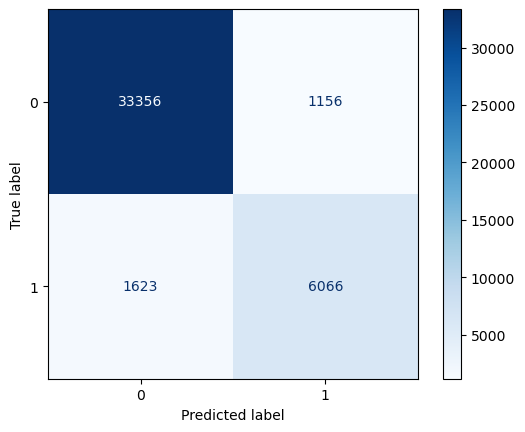

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     34512
           1       0.84      0.79      0.81      7689

    accuracy                           0.93     42201
   macro avg       0.90      0.88      0.89     42201
weighted avg       0.93      0.93      0.93     42201



In [164]:
conf_matrix = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1'])
disp.plot(cmap='Blues')
plt.show()
print(classification_report(y_test,pred_lr))

*******